In [6]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import naive_bayes
import cv2
%matplotlib inline
#給定duck與non_duck筆數,宣告x_train,y_train
duck_count=int(input('duck筆數'))
non_duck_count=int(input('non_duck筆數'))
x_train=np.zeros((1,1))
y_train=np.zeros((1))
#自動將duck_pixel處理為x_train資料
for i in range(duck_count):
    img_name='duck'+str(i)+'.jpg'
    duck=cv2.imread(img_name)
    duck=cv2.cvtColor(duck,cv2.COLOR_RGB2GRAY)
    duck=np.reshape(duck,(duck.shape[0]*duck.shape[1],1))
    x_train=np.concatenate((x_train,duck))
    duck=np.reshape(duck,(duck.shape[0]*duck.shape[1]))
    #將pixel值小於225的pixel設為0
    for i in range(duck.shape[0]):
        if duck[i]<225:
            duck[i]=0
    #利用處理完的duck_pixel建立Label (y_train)
    y_train_duck=np.zeros((duck.shape))
    for i in range(duck.shape[0]):
        if duck[i]>0:
            y_train_duck[i]=1
    y_train=np.concatenate((y_train,y_train_duck))
    print(img_name,'load complete')
#自動將non_duck_pixel處理為x_train資料
for i in range(non_duck_count):
    img_name='non_duck'+str(i)+'.jpg'
    non_duck=cv2.imread(img_name)
    non_duck=cv2.cvtColor(non_duck,cv2.COLOR_RGB2GRAY)
    x_train_non=np.reshape(non_duck,(non_duck.shape[0]*non_duck.shape[1],1))
    y_train_non=np.zeros((non_duck.shape[0]*non_duck.shape[1]))
    x_train=np.concatenate((x_train,x_train_non))
    y_train=np.concatenate((y_train,y_train_non))
    print(img_name,'load complete')
#bayesian 兩類特徵機率皆為0.5
bayesian=sklearn.naive_bayes.GaussianNB(priors=(0.5,0.5))
bayesian.fit(x_train,y_train)


duck筆數5
non_duck筆數12
duck0.jpg load complete
duck1.jpg load complete
duck2.jpg load complete
duck3.jpg load complete
duck4.jpg load complete
non_duck0.jpg load complete
non_duck1.jpg load complete
non_duck2.jpg load complete
non_duck3.jpg load complete
non_duck4.jpg load complete
non_duck5.jpg load complete
non_duck6.jpg load complete
non_duck7.jpg load complete
non_duck8.jpg load complete
non_duck9.jpg load complete
non_duck10.jpg load complete
non_duck11.jpg load complete


GaussianNB(priors=(0.5, 0.5), var_smoothing=1e-09)

True

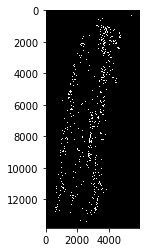

In [2]:
#讀入full_duck做辨識
fullduck=cv2.imread('full_duck.jpg')
fullduck=cv2.cvtColor(fullduck,cv2.COLOR_RGB2GRAY)
plt.imshow(fullduck,cmap='gray')
fullduck=np.reshape(fullduck,(13816*5946,1))
#利用訓練好之model預測full_duck_pixel為duck_pixel or non_duck_pixel
result=bayesian.predict(fullduck)
result=np.reshape(result,(13816,5946))
fullduck=np.reshape(fullduck,(13816,5946))
for i in range(13816):
    for j in range(5946):
        if result[i][j]==0:
            fullduck[i][j]=0
plt.imshow(fullduck,cmap='gray')
cv2.imwrite('output_final.jpg', fullduck)

In [3]:
#印出model兩類之平均與標準差
print('model theta\n',bayesian.theta_)
print('model sigma\n',bayesian.sigma_)
print('training sample\n',bayesian.class_count_)

model theta
 [[114.72653587]
 [246.78793639]]
model sigma
 [[2066.10827094]
 [  55.79143618]]
training sample
 [19787268.   351404.]


C:\Users\Paul\Anaconda3\envs\opencv\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Paul\Anaconda3\envs\opencv\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # This is added back by InteractiveShellApp.init_path()


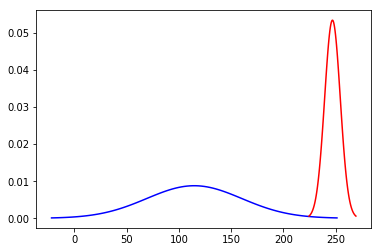

In [4]:
#兩類資料之高斯分布
import matplotlib.mlab as mlab
import math
mu =bayesian.theta_[0][0]
sigma =bayesian.sigma_[0][0]**0.5
x1 = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
mu2=bayesian.theta_[1][0]
sigma2=bayesian.sigma_[1][0]**0.5
x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
x=np.linspace(0,255)
#blue為non_duck_pixel分布,red為duck_pixel分布
plt.plot(x1,mlab.normpdf(x1, mu, sigma),c='blue')
plt.plot(x2,mlab.normpdf(x2, mu2, sigma2),c='red')
plt.savefig("sample_Gaussian.jpg")
plt.show()

C:\Users\Paul\Anaconda3\envs\opencv\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Paul\Anaconda3\envs\opencv\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # This is added back by InteractiveShellApp.init_path()


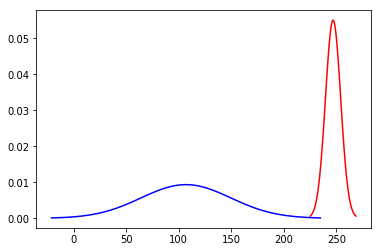

In [5]:
# gaussian model test
import matplotlib.mlab as mlab
import math
mu =106.96579745
sigma =1817.25588302**0.5
x1 = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
mu2=246.96092199
sigma2=52.4354697**0.5
x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
x=np.linspace(0,255)
plt.plot(x1,mlab.normpdf(x1, mu, sigma),c='blue')
plt.plot(x2,mlab.normpdf(x2, mu2, sigma2),c='red')
plt.savefig("Gaussian distribution.jpg")
plt.show()